In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

c:\Users\afias\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(Path('winequality-white.csv'))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# EXPLORATORY DATA ANALYSIS

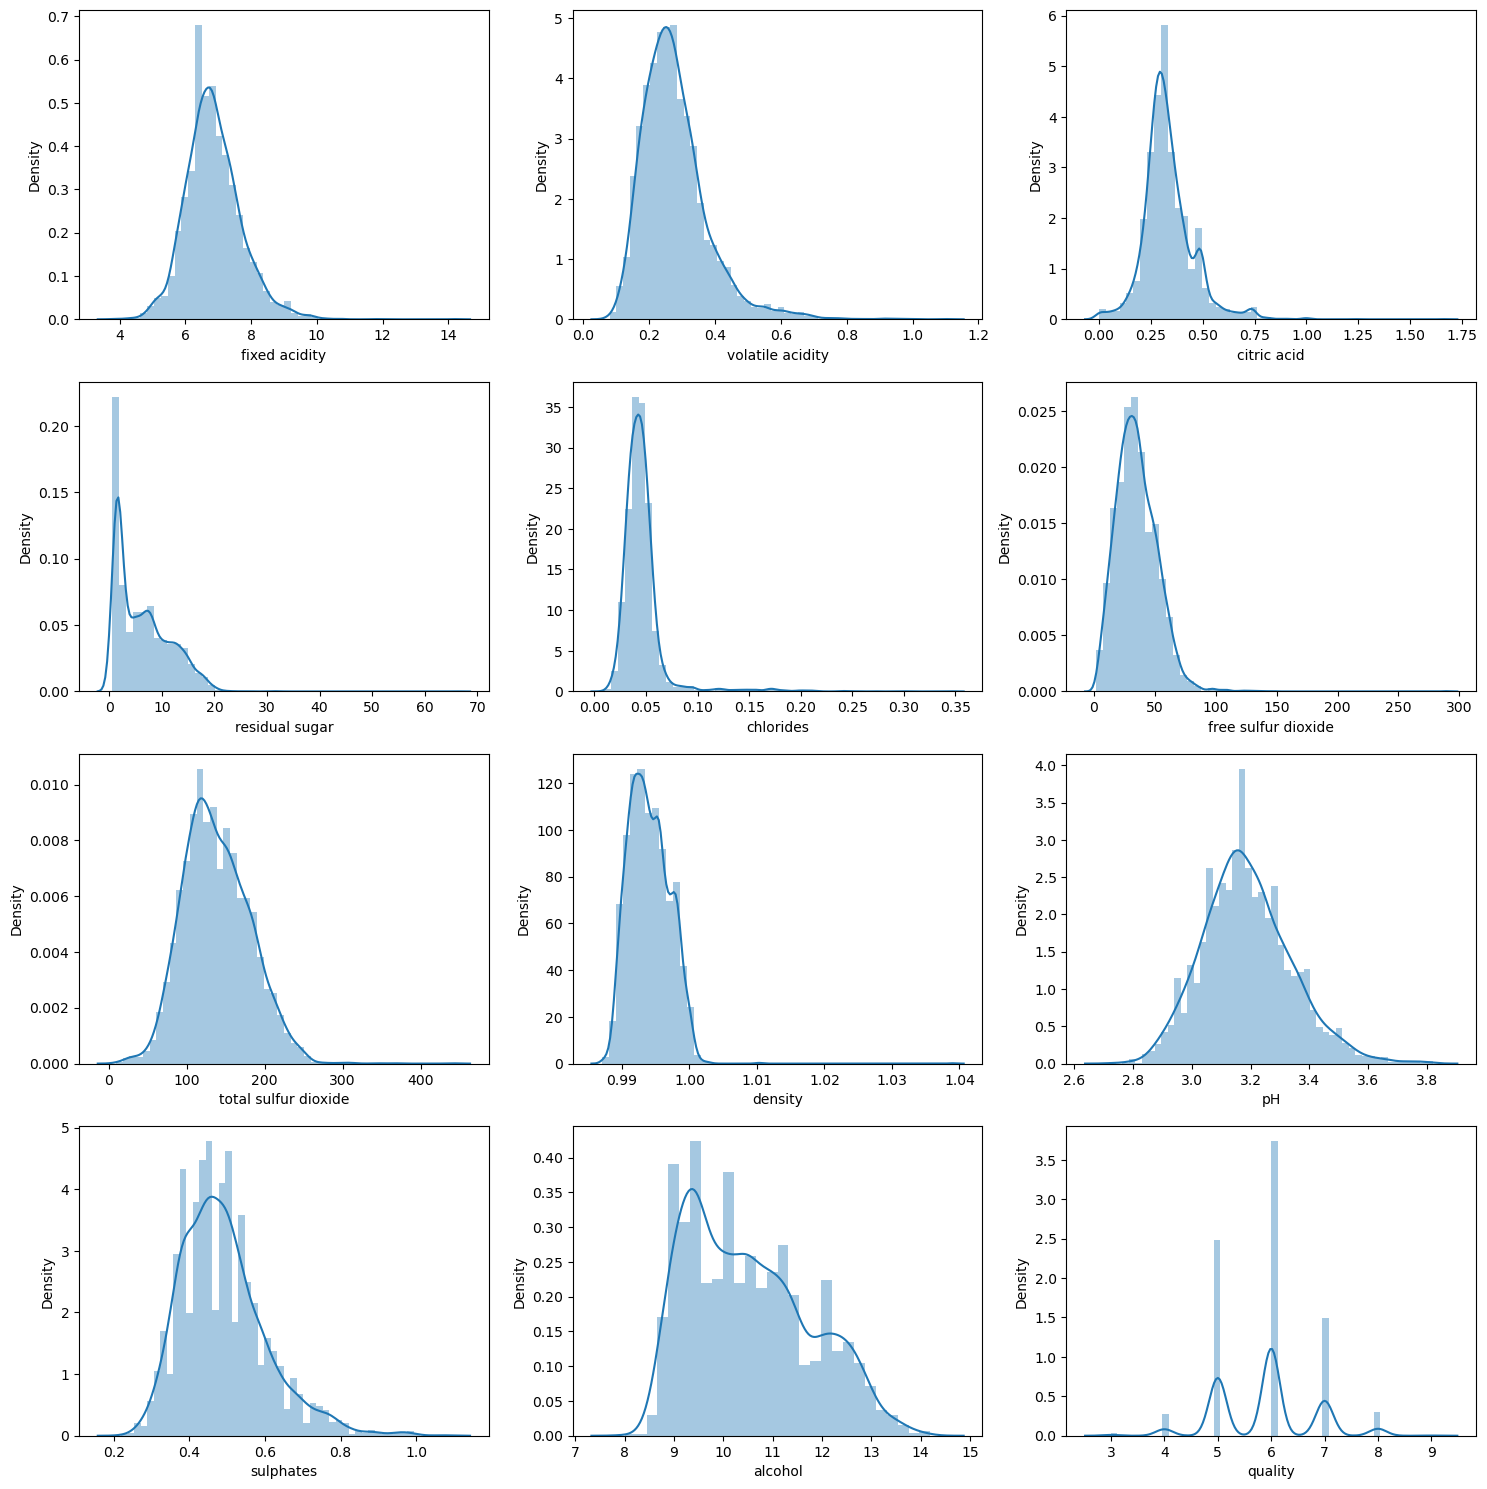

In [5]:
## Picturesque of columns
plt.figure(figsize=(15,15))
plotfig=1

for col in df:
    if plotfig<=12:
        ax=plt.subplot(4, 3, plotfig)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=10)
        
    plotfig+=1
    
plt.tight_layout()
plt.show()

In [6]:
# Check for outliers use box plots to identify outliers
# Remove outliers that are more than 2 standard deviations away from the mean
df = df[(df["quality"] - df["quality"].mean()).abs() < 2 * df["quality"].std()]

<Axes: >

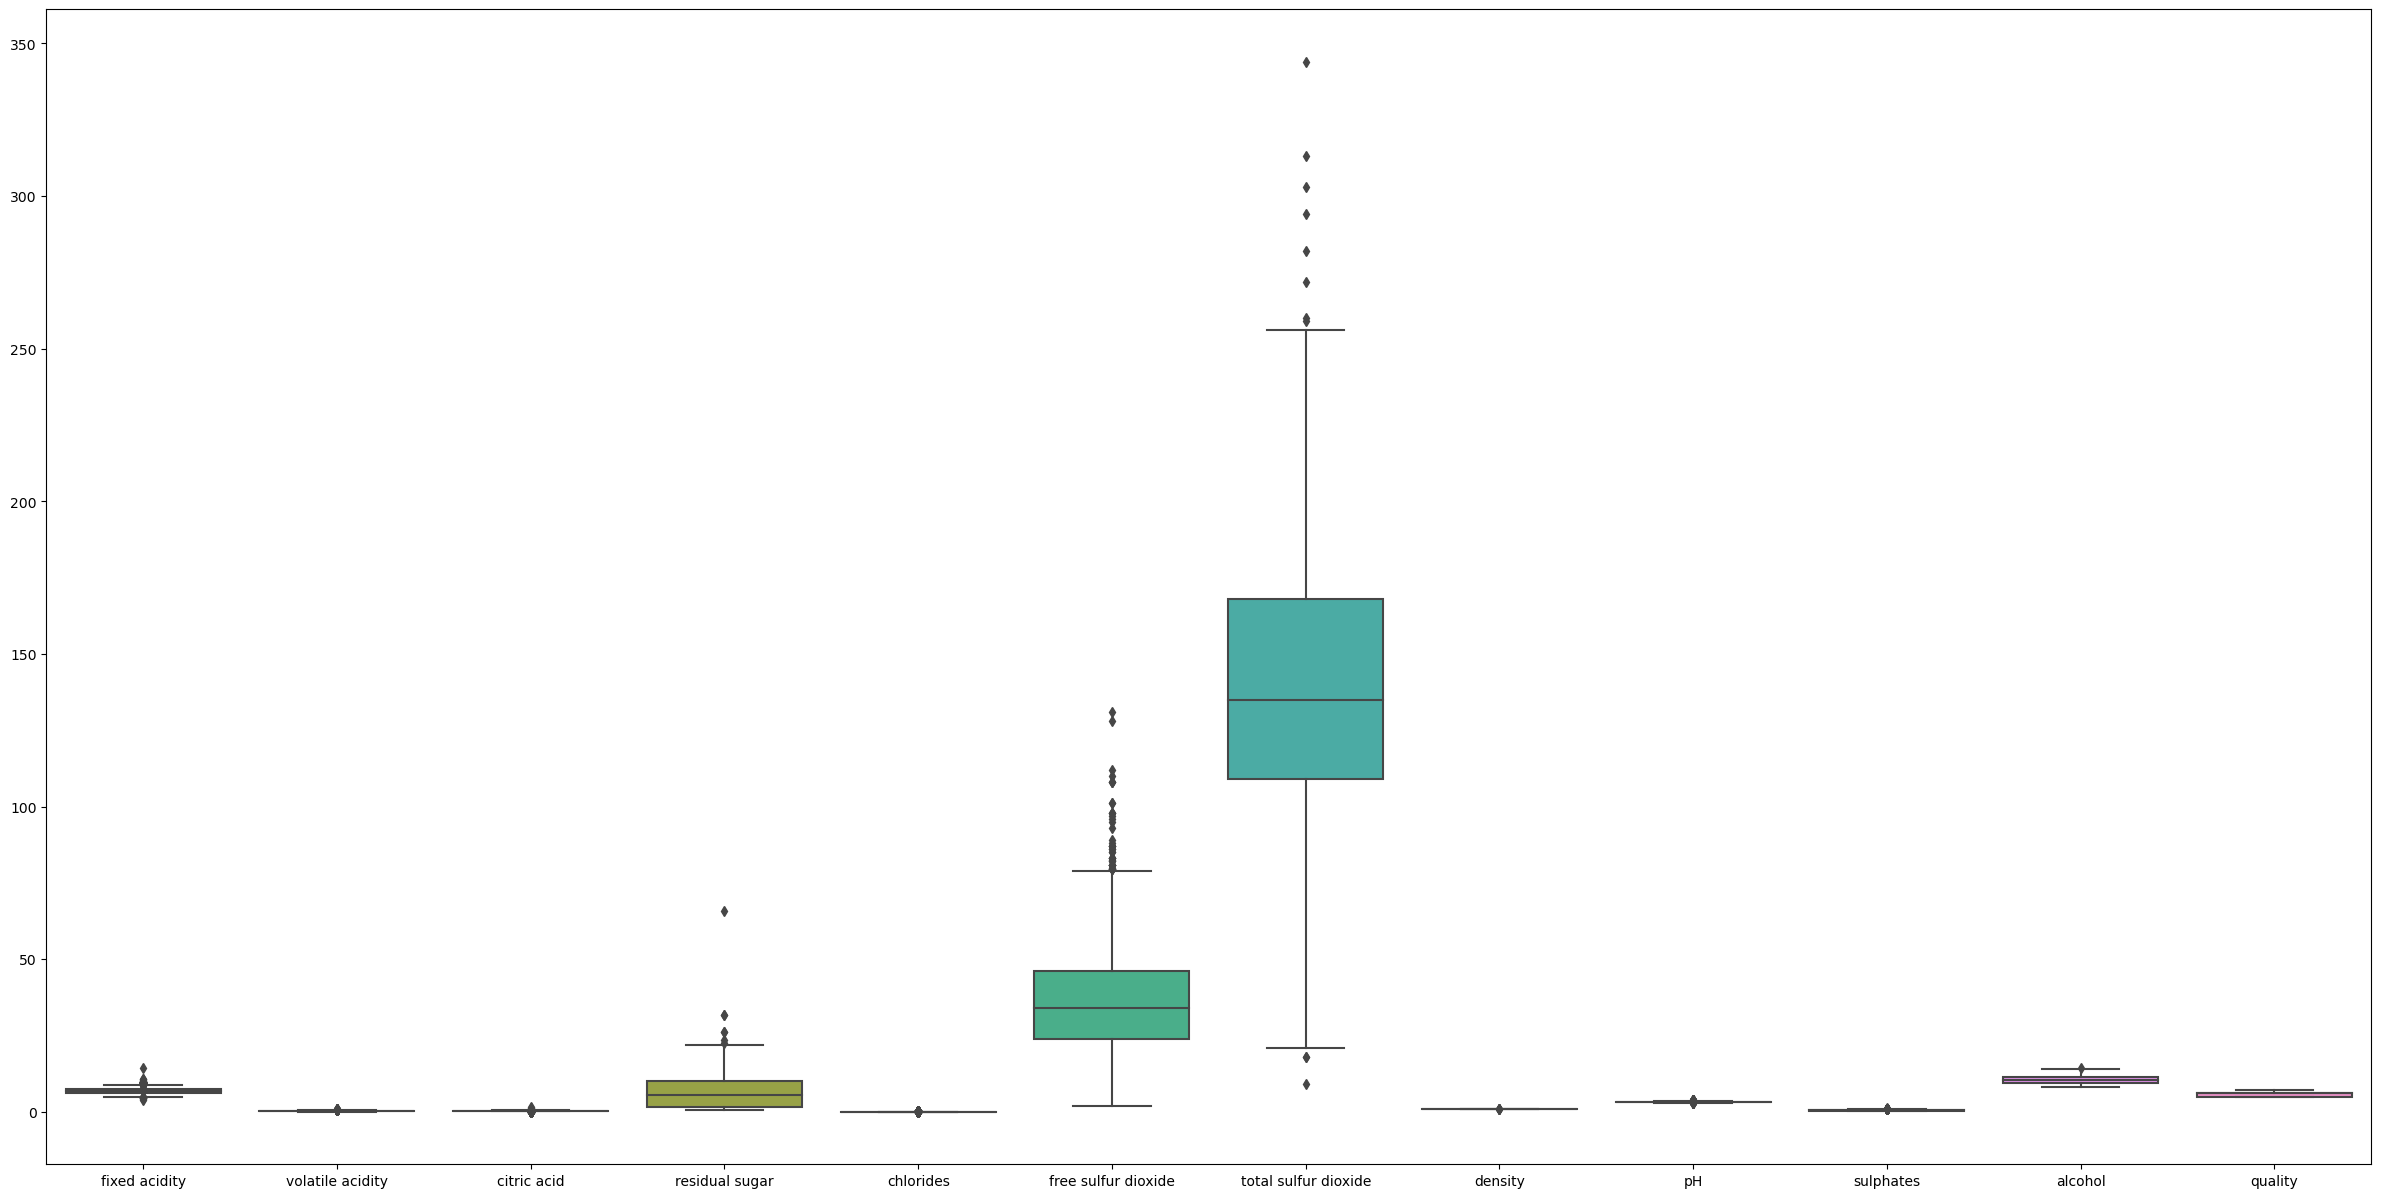

In [7]:
# boxplot for each columns
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

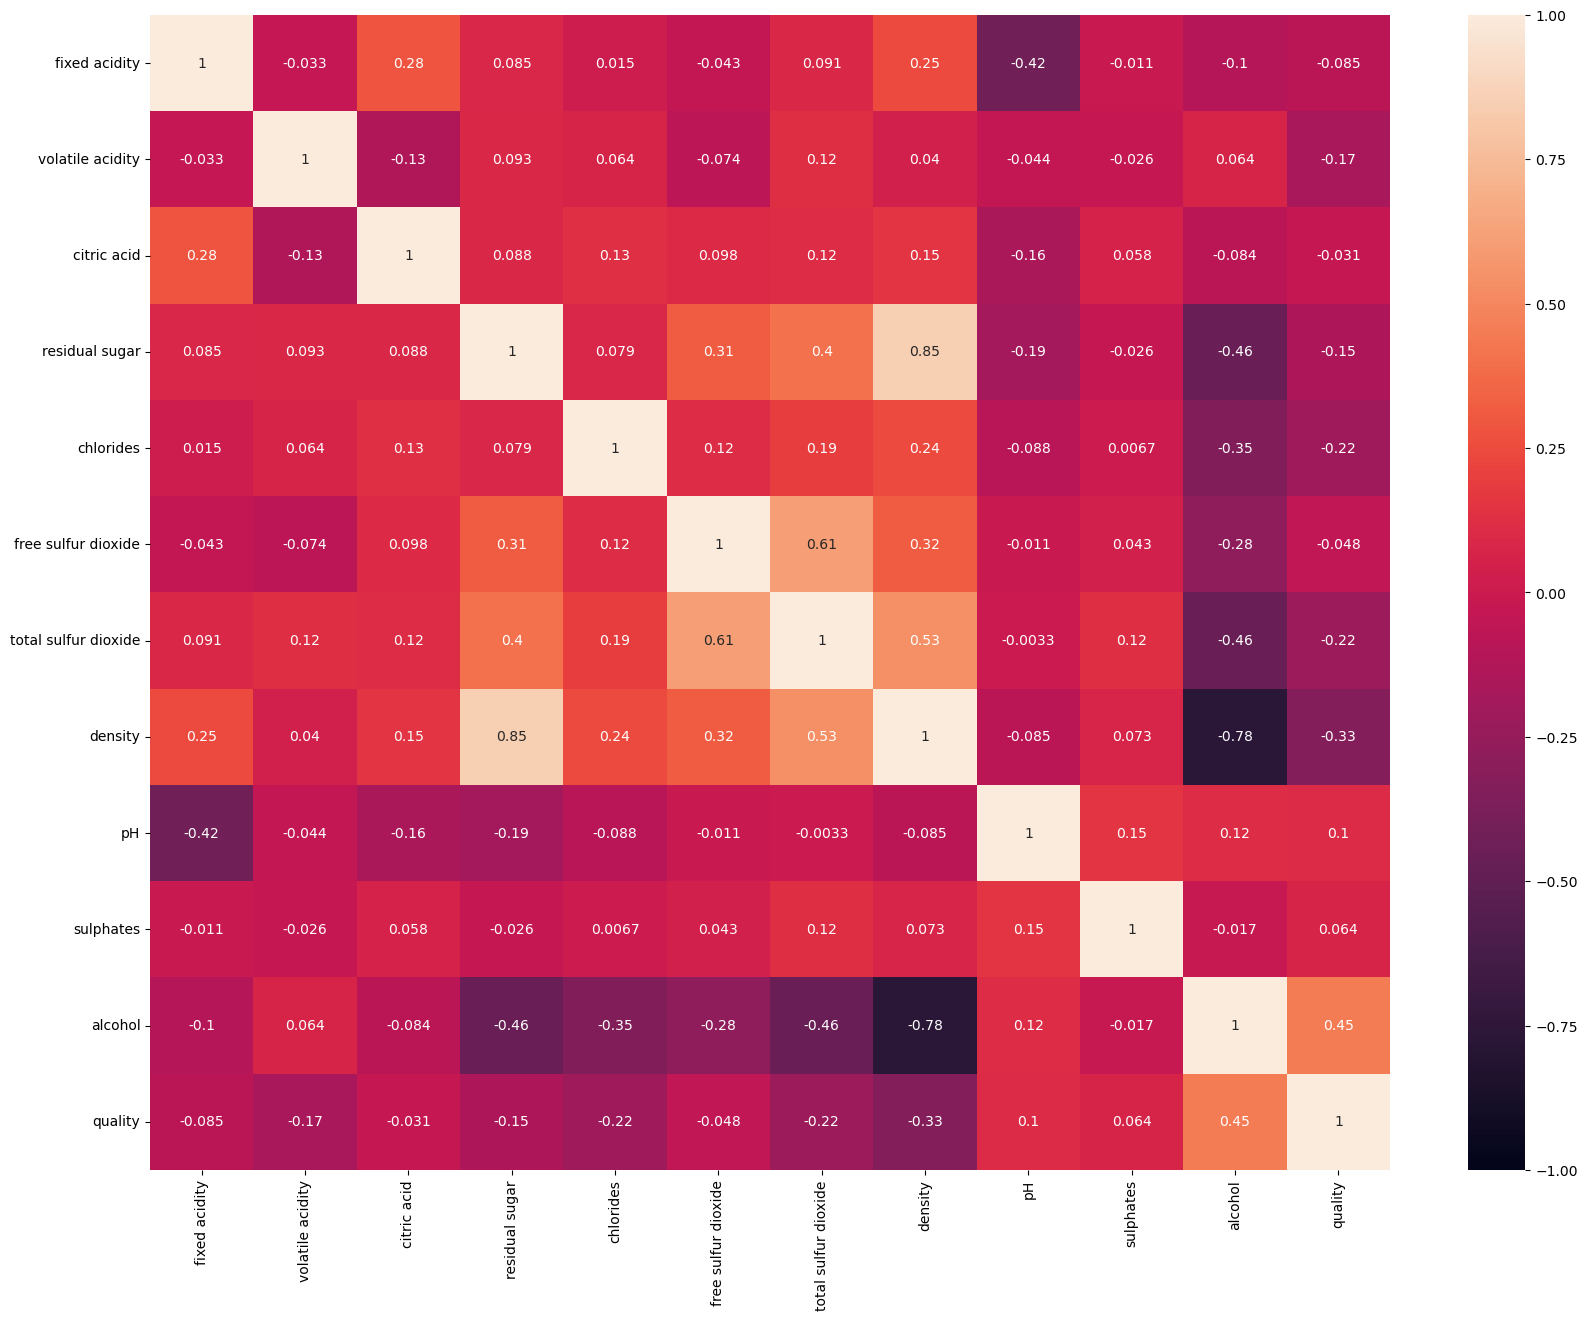

In [9]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

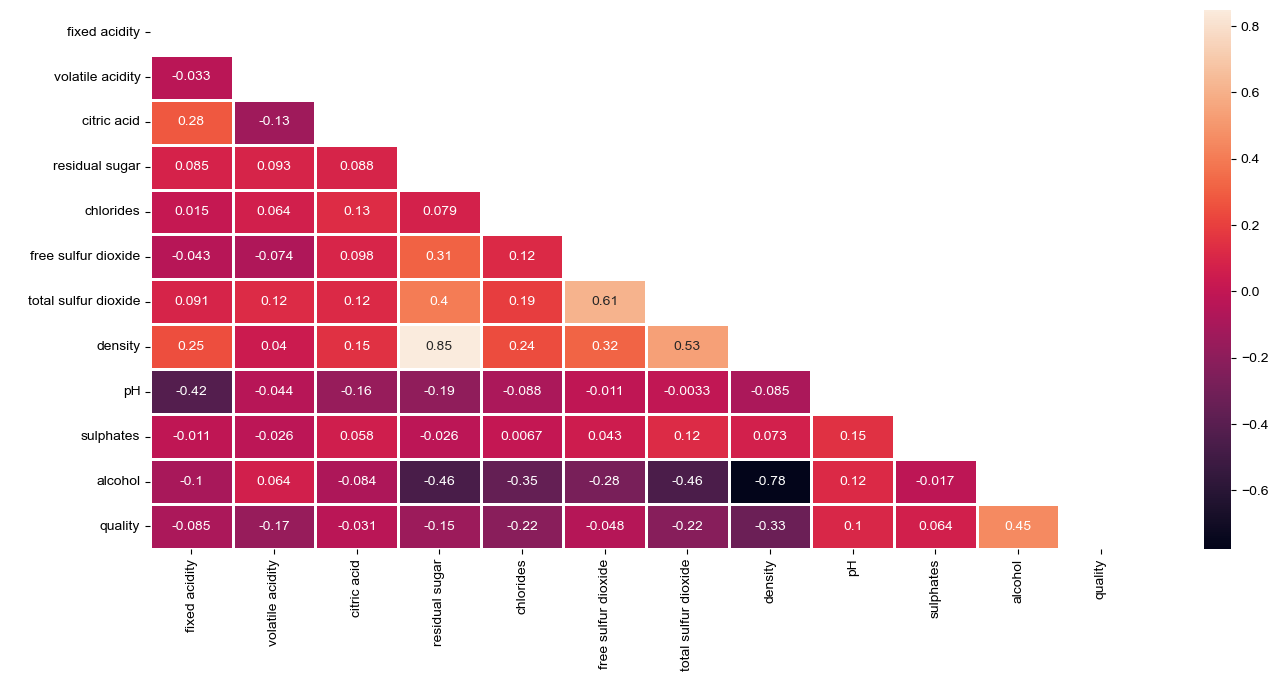

In [10]:
# Heatmap other display
plt.figure(figsize=(16,7))

correlation=df.corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask ,annot=True, fmt='0.2g', linewidth=1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar
     

In [11]:
## features (X values)
X = df.drop('quality', axis=1)

In [12]:
## target (y)
y = df.iloc[:, -1]

In [13]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [14]:
# View Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3401, 11)
(3401,)
(1134, 11)
(1134,)


In [15]:
# scale data
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

# Implementing Machine Learning Models

In [16]:
# Instantiate Logistic regression
model = LogisticRegression(multi_class='multinomial')

In [17]:
# fit data
lr_model = model.fit(X_train_scaled, y_train)

In [18]:
# Make a prediction using the testing data
pred = model.predict(X_test_scaled)

pd.DataFrame(
    {
        'Prediction' : pred,
        'Actual': y_test
    }
)

,Prediction,Actual
1480,6,6
2445,5,5
3618,6,7
327,6,6
715,6,7
...,...,...
2990,7,7
2535,6,6
4631,6,7
1249,5,5


# Logistic Reg Performance Metrics

In [19]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_acc_score = accuracy_score(y_test, pred)
print(f'Testing Accuracy Score: {lr_acc_score}')

Testing Accuracy Score: 0.5802469135802469


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.63      0.52      0.57       364
           6       0.56      0.76      0.64       550
           7       0.61      0.23      0.34       220

    accuracy                           0.58      1134
   macro avg       0.60      0.50      0.52      1134
weighted avg       0.59      0.58      0.56      1134



# KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
knn_pred = model.predict(X_test_scaled)

In [23]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print(f'Testing Accuracy Score: {knn_acc_score}')

Testing Accuracy Score: 0.5802469135802469


In [24]:
# Calssification Report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           5       0.63      0.52      0.57       364
           6       0.56      0.76      0.64       550
           7       0.61      0.23      0.34       220

    accuracy                           0.58      1134
   macro avg       0.60      0.50      0.52      1134
weighted avg       0.59      0.58      0.56      1134



# Support Vector Classification

In [25]:
# SVC
from sklearn.svm import SVC
mod = SVC()
svc_model = mod.fit(X_train_scaled, y_train)
svc_pred = mod.predict(X_test_scaled)

In [26]:
svc_acc_score = accuracy_score(y_test, svc_pred)
print(f'Testing Accuracy Score: {svc_acc_score}')

Testing Accuracy Score: 0.6128747795414462


In [27]:
# Calssification Report
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           5       0.66      0.60      0.63       364
           6       0.59      0.77      0.67       550
           7       0.68      0.24      0.35       220

    accuracy                           0.61      1134
   macro avg       0.64      0.54      0.55      1134
weighted avg       0.63      0.61      0.59      1134



# Stochastic Gradient Descent

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [29]:
# best parameter and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.563658789028808


In [30]:
sgd = SGDClassifier(alpha = 0.1, loss = 'log_loss', penalty = 'l2')
modd = sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)

sgd_acc_score = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy Score: {sgd_acc_score}')


Testing Accuracy Score: 0.5485008818342152


In [31]:
# Calssification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.63      0.42      0.51       364
           6       0.53      0.85      0.65       550
           7       0.60      0.01      0.03       220

    accuracy                           0.55      1134
   macro avg       0.59      0.43      0.39      1134
weighted avg       0.57      0.55      0.48      1134



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
moddtc = dtc.fit(X_train_scaled, y_train)

In [33]:
# accuracy score
predtc = moddtc.predict(X_test_scaled)
dtc_acc_score = accuracy_score(y_test, predtc)
print(f"Testing Accuracy Score:{dtc_acc_score}")

Testing Accuracy Score:0.6287477954144621


In [34]:
# Calssification Report
print(classification_report(y_test, predtc))

              precision    recall  f1-score   support

           5       0.65      0.65      0.65       364
           6       0.65      0.65      0.65       550
           7       0.53      0.54      0.54       220

    accuracy                           0.63      1134
   macro avg       0.61      0.61      0.61      1134
weighted avg       0.63      0.63      0.63      1134



# RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
rf_pred = rf.predict(X_test_scaled)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(f"Testing Accuracy Score: {rf_acc_score}")

Testing Accuracy Score: 0.6957671957671958


In [37]:
# Calssification Report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           5       0.71      0.68      0.70       364
           6       0.67      0.77      0.72       550
           7       0.77      0.53      0.63       220

    accuracy                           0.70      1134
   macro avg       0.72      0.66      0.68      1134
weighted avg       0.70      0.70      0.69      1134



# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [39]:
# print accuracy score
gb_pred = gb.predict(X_test_scaled)
gb_acc_score = accuracy_score(y_test, gb_pred)
print(f'Testing Accuracy Score: {gb_acc_score}')

Testing Accuracy Score: 0.6216931216931217


In [40]:
# Calssification Report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           5       0.66      0.63      0.64       364
           6       0.60      0.73      0.66       550
           7       0.63      0.35      0.45       220

    accuracy                           0.62      1134
   macro avg       0.63      0.57      0.58      1134
weighted avg       0.62      0.62      0.61      1134



# Light Gradient Boosting Machine Classifier

In [41]:
# Model. Fit. Predict
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_acc_score = accuracy_score(y_test, lgbm_pred)
print(f'Testing Accuracy Score: {lgbm_acc_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 3401, number of used features: 11
[LightGBM] [Info] Start training from score -1.135143
[LightGBM] [Info] Start training from score -0.724507
[LightGBM] [Info] Start training from score -1.639585
Testing Accuracy Score: 0.6728395061728395


In [42]:
# Calssification Report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           5       0.67      0.70      0.69       364
           6       0.67      0.72      0.69       550
           7       0.70      0.52      0.60       220

    accuracy                           0.67      1134
   macro avg       0.68      0.65      0.66      1134
weighted avg       0.67      0.67      0.67      1134



# CatBoost Classifier

In [43]:
# Model. Fit. Predict
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train_scaled, y_train)
cat_pred = lgbm.predict(X_test_scaled)
cat_acc_score = accuracy_score(y_test, cat_pred)
print(f'Testing Accuracy Score: {cat_acc_score}')

Learning rate set to 0.084224
0:	learn: 1.0703889	total: 159ms	remaining: 2m 38s
1:	learn: 1.0476379	total: 170ms	remaining: 1m 24s
2:	learn: 1.0252442	total: 177ms	remaining: 58.8s
3:	learn: 1.0077036	total: 184ms	remaining: 45.8s
4:	learn: 0.9893936	total: 190ms	remaining: 37.8s
5:	learn: 0.9760536	total: 196ms	remaining: 32.5s
6:	learn: 0.9627642	total: 202ms	remaining: 28.6s
7:	learn: 0.9502577	total: 208ms	remaining: 25.8s
8:	learn: 0.9382731	total: 213ms	remaining: 23.5s
9:	learn: 0.9281541	total: 219ms	remaining: 21.6s
10:	learn: 0.9173506	total: 224ms	remaining: 20.1s
11:	learn: 0.9077762	total: 230ms	remaining: 18.9s
12:	learn: 0.8989965	total: 235ms	remaining: 17.9s
13:	learn: 0.8916943	total: 242ms	remaining: 17s
14:	learn: 0.8838355	total: 249ms	remaining: 16.4s
15:	learn: 0.8785398	total: 256ms	remaining: 15.8s
16:	learn: 0.8736329	total: 264ms	remaining: 15.3s
17:	learn: 0.8664521	total: 271ms	remaining: 14.8s
18:	learn: 0.8607568	total: 277ms	remaining: 14.3s
19:	learn: 

In [44]:
# Calssification Report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           5       0.67      0.70      0.69       364
           6       0.67      0.72      0.69       550
           7       0.70      0.52      0.60       220

    accuracy                           0.67      1134
   macro avg       0.68      0.65      0.66      1134
weighted avg       0.67      0.67      0.67      1134



# Multi-Layer Preceptron Classification

In [46]:
# Import a new classifier from SKLearn, Multi-Layer Preceptron Classifier
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
model = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    max_iter=2500,
    hidden_layer_sizes=(100, 60, 40)
)

In [47]:
# Fit the model using the training data
model = model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([6, 5, 6, 6, 6, 6, 6, 5, 6, 5], dtype=int64)

In [48]:
mlpc_acc_score = accuracy_score(y_test, pred)
print(f'Testing Accuracy Score: {mlpc_acc_score}')

Testing Accuracy Score: 0.599647266313933


In [49]:
# Calssification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.65      0.59      0.62       364
           6       0.58      0.75      0.65       550
           7       0.62      0.24      0.35       220

    accuracy                           0.60      1134
   macro avg       0.61      0.53      0.54      1134
weighted avg       0.61      0.60      0.58      1134



In [50]:
# models in dataframe
models = pd.DataFrame(
    {
        'Model' : ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'LGBM', 'Cat Boost', 'MLPClassifier'],
        'Score': [lr_acc_score, knn_acc_score, svc_acc_score, dtc_acc_score, rf_acc_score, gb_acc_score, lgbm_acc_score, cat_acc_score, mlpc_acc_score]
    }
)
models.sort_values(by = 'Score', ascending= False)

,Model,Score
4,Random Forest,0.695767
6,LGBM,0.672840
7,Cat Boost,0.672840
3,Decision Tree,0.628748
5,Gradient Boosting,0.621693
2,SVC,0.612875
8,MLPClassifier,0.599647
0,Logistic Regression,0.580247
1,KNN,0.580247


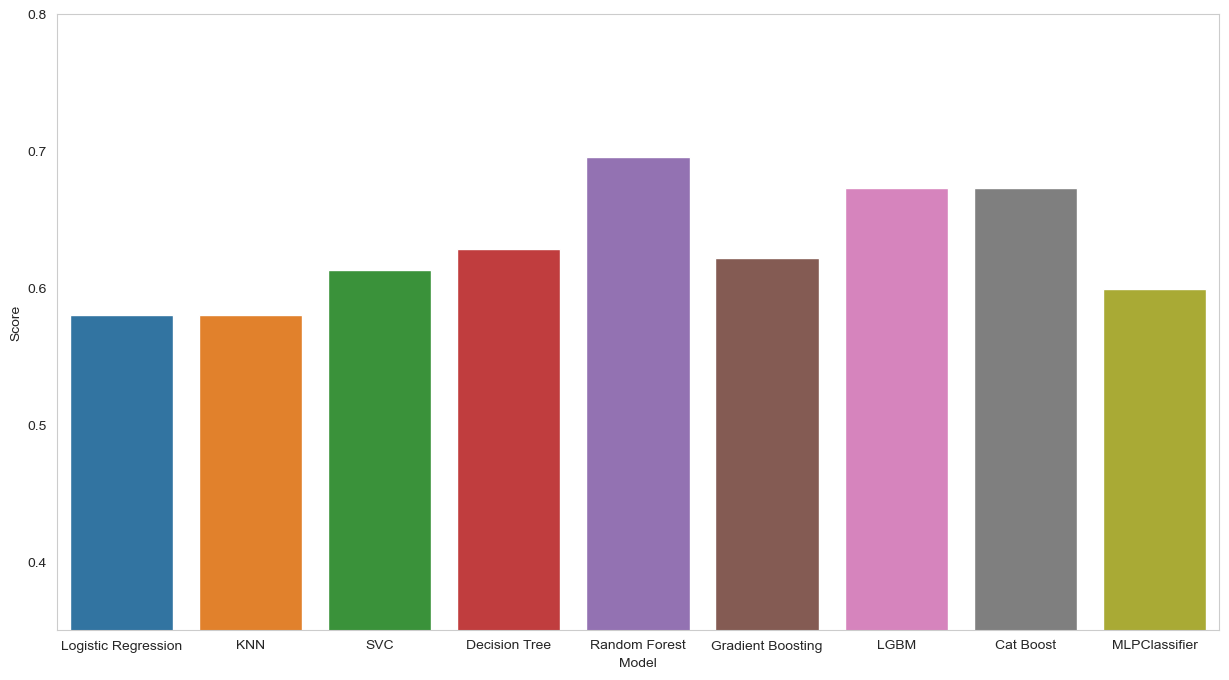

In [51]:
plt.figure(figsize = (15, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.35, 0.80)
plt.show()

In [52]:
import pickle

In [53]:
filename = 'wwine_quality.sav'
pickle.dump(lr_model, open(filename, 'wb'))